# Build a machine learning model to predict salary  based on position for a given dataset
https://drive.google.com/open?id=1jKfNxQkybZKprVpCkoL16mTjmSSnCol3


In [75]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [76]:
# Loading dataset
dataset = pd.read_csv("Position_Salaries.csv")
# Statistical description of dataset
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [79]:
# Checking null values
print(dataset.isnull().sum())
print(dataset.isna().sum())

Position    0
Level       0
Salary      0
dtype: int64
Position    0
Level       0
Salary      0
dtype: int64


In [80]:
# Removing duplicated values
dataset.duplicated(keep='first')

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [81]:
# printing dataset
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


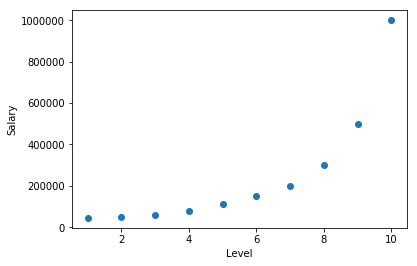

In [91]:
# plotting actual data
plt.scatter(dataset['Level'], dataset['Salary'])
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [100]:
X = dataset['Level'].values.reshape(-1, 1)  # independent variable 
y = dataset['Salary'].values.reshape(-1, 1)  # dependent variable
# Spliting training and test data to train algorithm
X_train, X_test, y_train, y_test = train_test_split(dataset['Level'], dataset['Salary'], test_size=0.2, random_state=0)

In [101]:
# Loading Decision Tree Regressor algorithm
regressor = DecisionTreeRegressor()
# Training algorithm
regressor.fit(X_train.values.reshape(-1, 1), y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [103]:
# predicting values
predicted_values = regressor.predict(X)

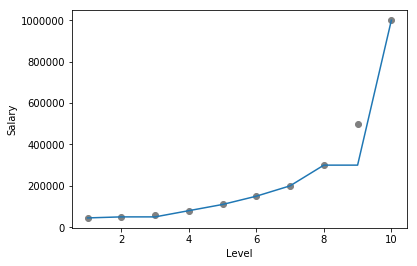

In [105]:
# plotting difference between actual and predicted values
plt.scatter(dataset['Level'], dataset['Salary'], color='gray')
plt.plot(dataset['Level'], predicted_values)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

In [106]:
print("Calculating errors")
print(metrics.mean_absolute_error(y, predicted_values))
print(metrics.mean_squared_error(y, predicted_values))

Calculating errors
21000.0
4010000000.0


In [99]:
print("Accuracy score")
print(metrics.accuracy_score(y, regressor.predict(X))*100)

Accuracy score
80.0
